# Analysis and Prediction-Indian Liver Patients

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [191]:
dataset = pd.read_csv('indian_liver_patient.csv')

In [192]:
dataset.head()
print(dataset)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [193]:
dataset.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

# Data Visualization

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


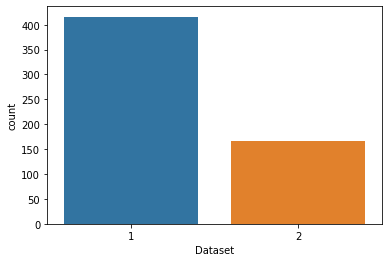

In [194]:
sns.countplot(data=dataset, x = 'Dataset', label='Count')

LD, NLD = dataset['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


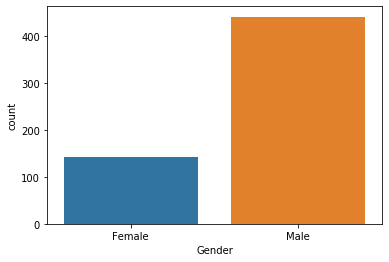

In [195]:
sns.countplot(data=dataset, x = 'Gender', label='Count')

M, F = dataset['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

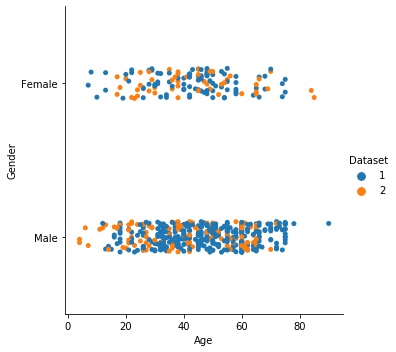

In [240]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=dataset);

Age seems to be a factor for liver disease for both male and female genders

Text(0.5, 0.98, 'Disease by Gender and Age')

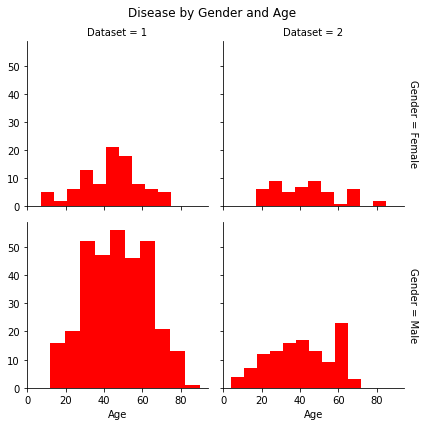

In [197]:
g = sns.FacetGrid(dataset, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

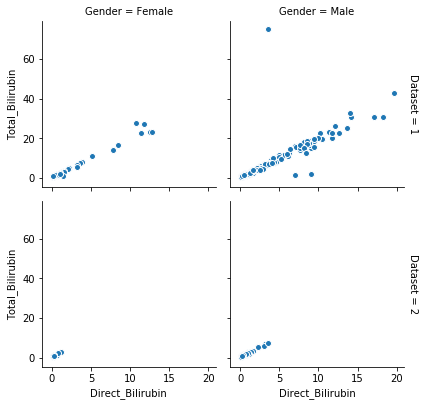

In [198]:
g = sns.FacetGrid(dataset, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

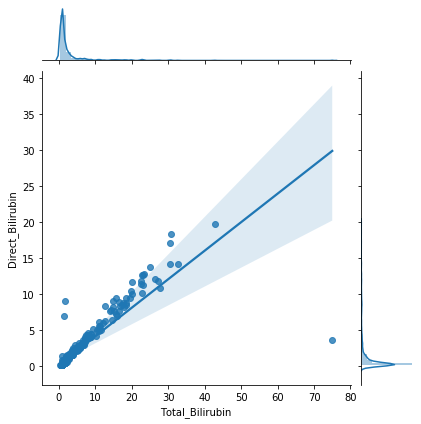

In [199]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=dataset, kind="reg")

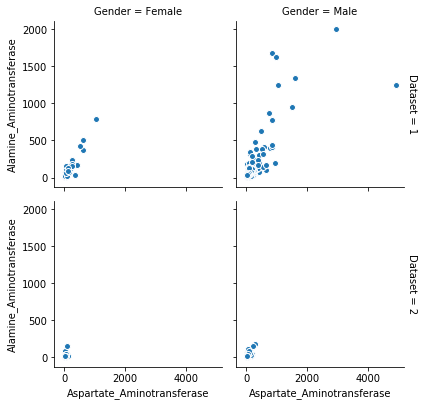

In [200]:
g = sns.FacetGrid(dataset, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

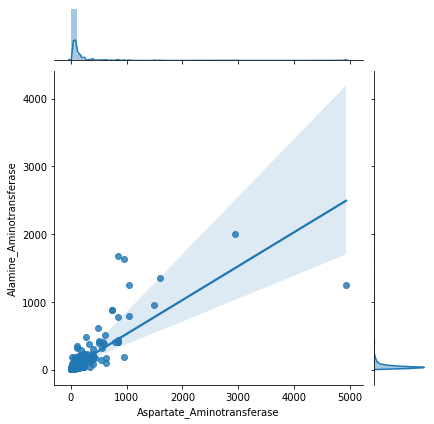

In [201]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=dataset, kind="reg")

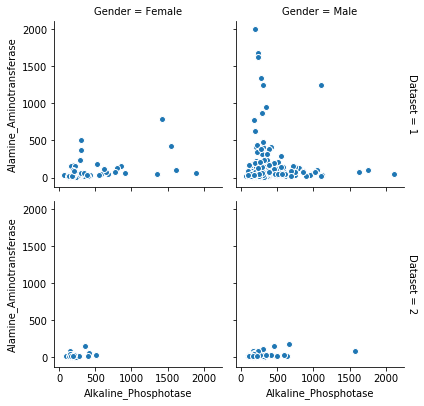

In [202]:
g = sns.FacetGrid(dataset, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

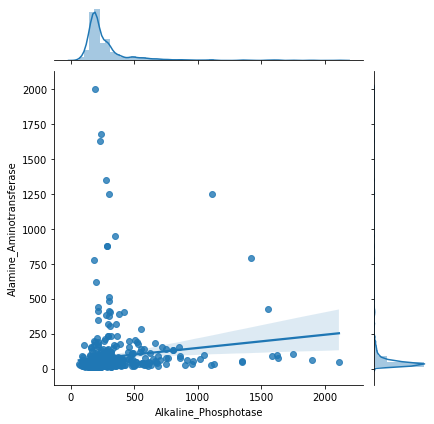

In [203]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=dataset, kind="reg")

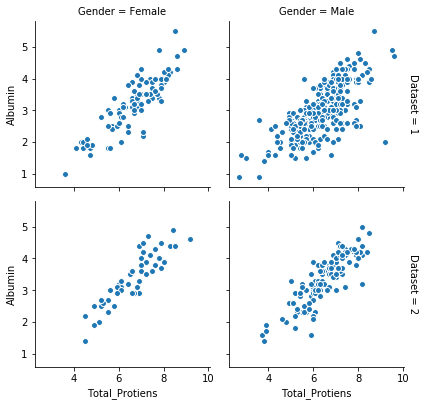

In [204]:
g = sns.FacetGrid(dataset, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

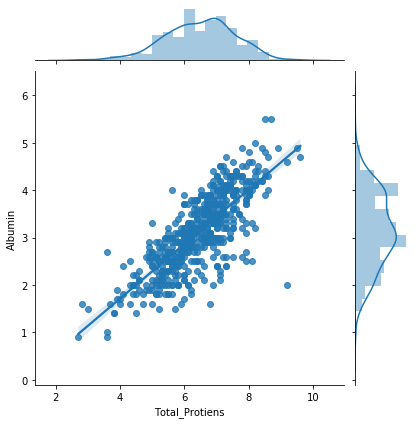

In [205]:
sns.jointplot("Total_Protiens", "Albumin", data=dataset, kind="reg")

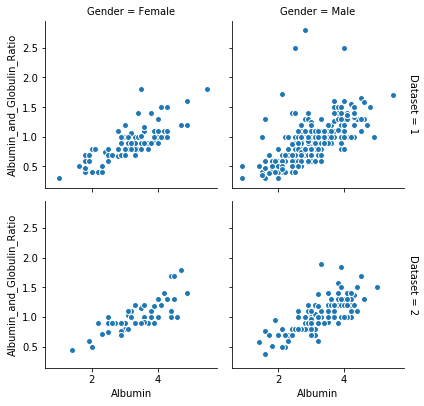

In [206]:
g = sns.FacetGrid(dataset, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

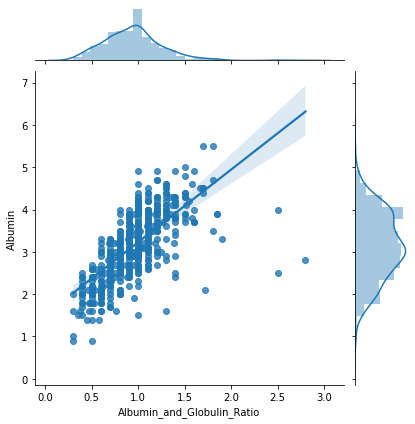

In [207]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=dataset, kind="reg")

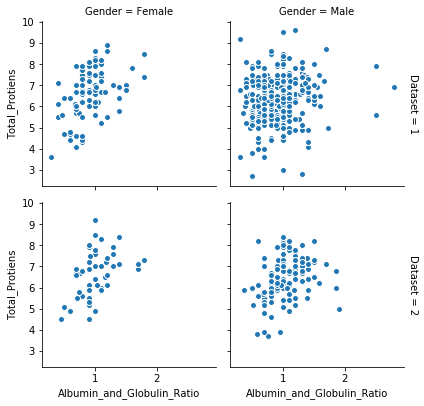

In [208]:
g = sns.FacetGrid(dataset, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [209]:
nan_rows=dataset[dataset['Albumin_and_Globulin_Ratio'].isnull()]
print(nan_rows)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
209      3.9                         NaN        1  
241      3.1                         NaN        1  
253      2.7                         NaN        2  
312      4.8        

In [210]:
dataset['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [211]:
dataset=dataset.dropna()

In [212]:
dataset.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

In [213]:
dataset.shape

(579, 11)

In [214]:
x=dataset.iloc[:,0:10]

x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [215]:
y=dataset.iloc[:,10]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [216]:
x.Gender=x.Gender.map( {'Male':0, 'Female':1} )

In [217]:
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40


In [218]:
liver_corr = x.corr()

In [219]:
liver_corr

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,-0.055881,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408
Gender,-0.055881,1.000000,-0.088068,-0.099160,0.029368,-0.081339,-0.079421,0.095149,0.095579,0.003424
Total_Bilirubin,0.011000,-0.088068,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267
Direct_Bilirubin,0.006784,-0.099160,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125
Alkaline_Phosphotase,0.078878,0.029368,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166
Alamine_Aminotransferase,-0.087799,-0.081339,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375
Aspartate_Aminotransferase,-0.020499,-0.079421,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040
Total_Protiens,-0.186248,0.095149,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887
Albumin,-0.264211,0.095579,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000


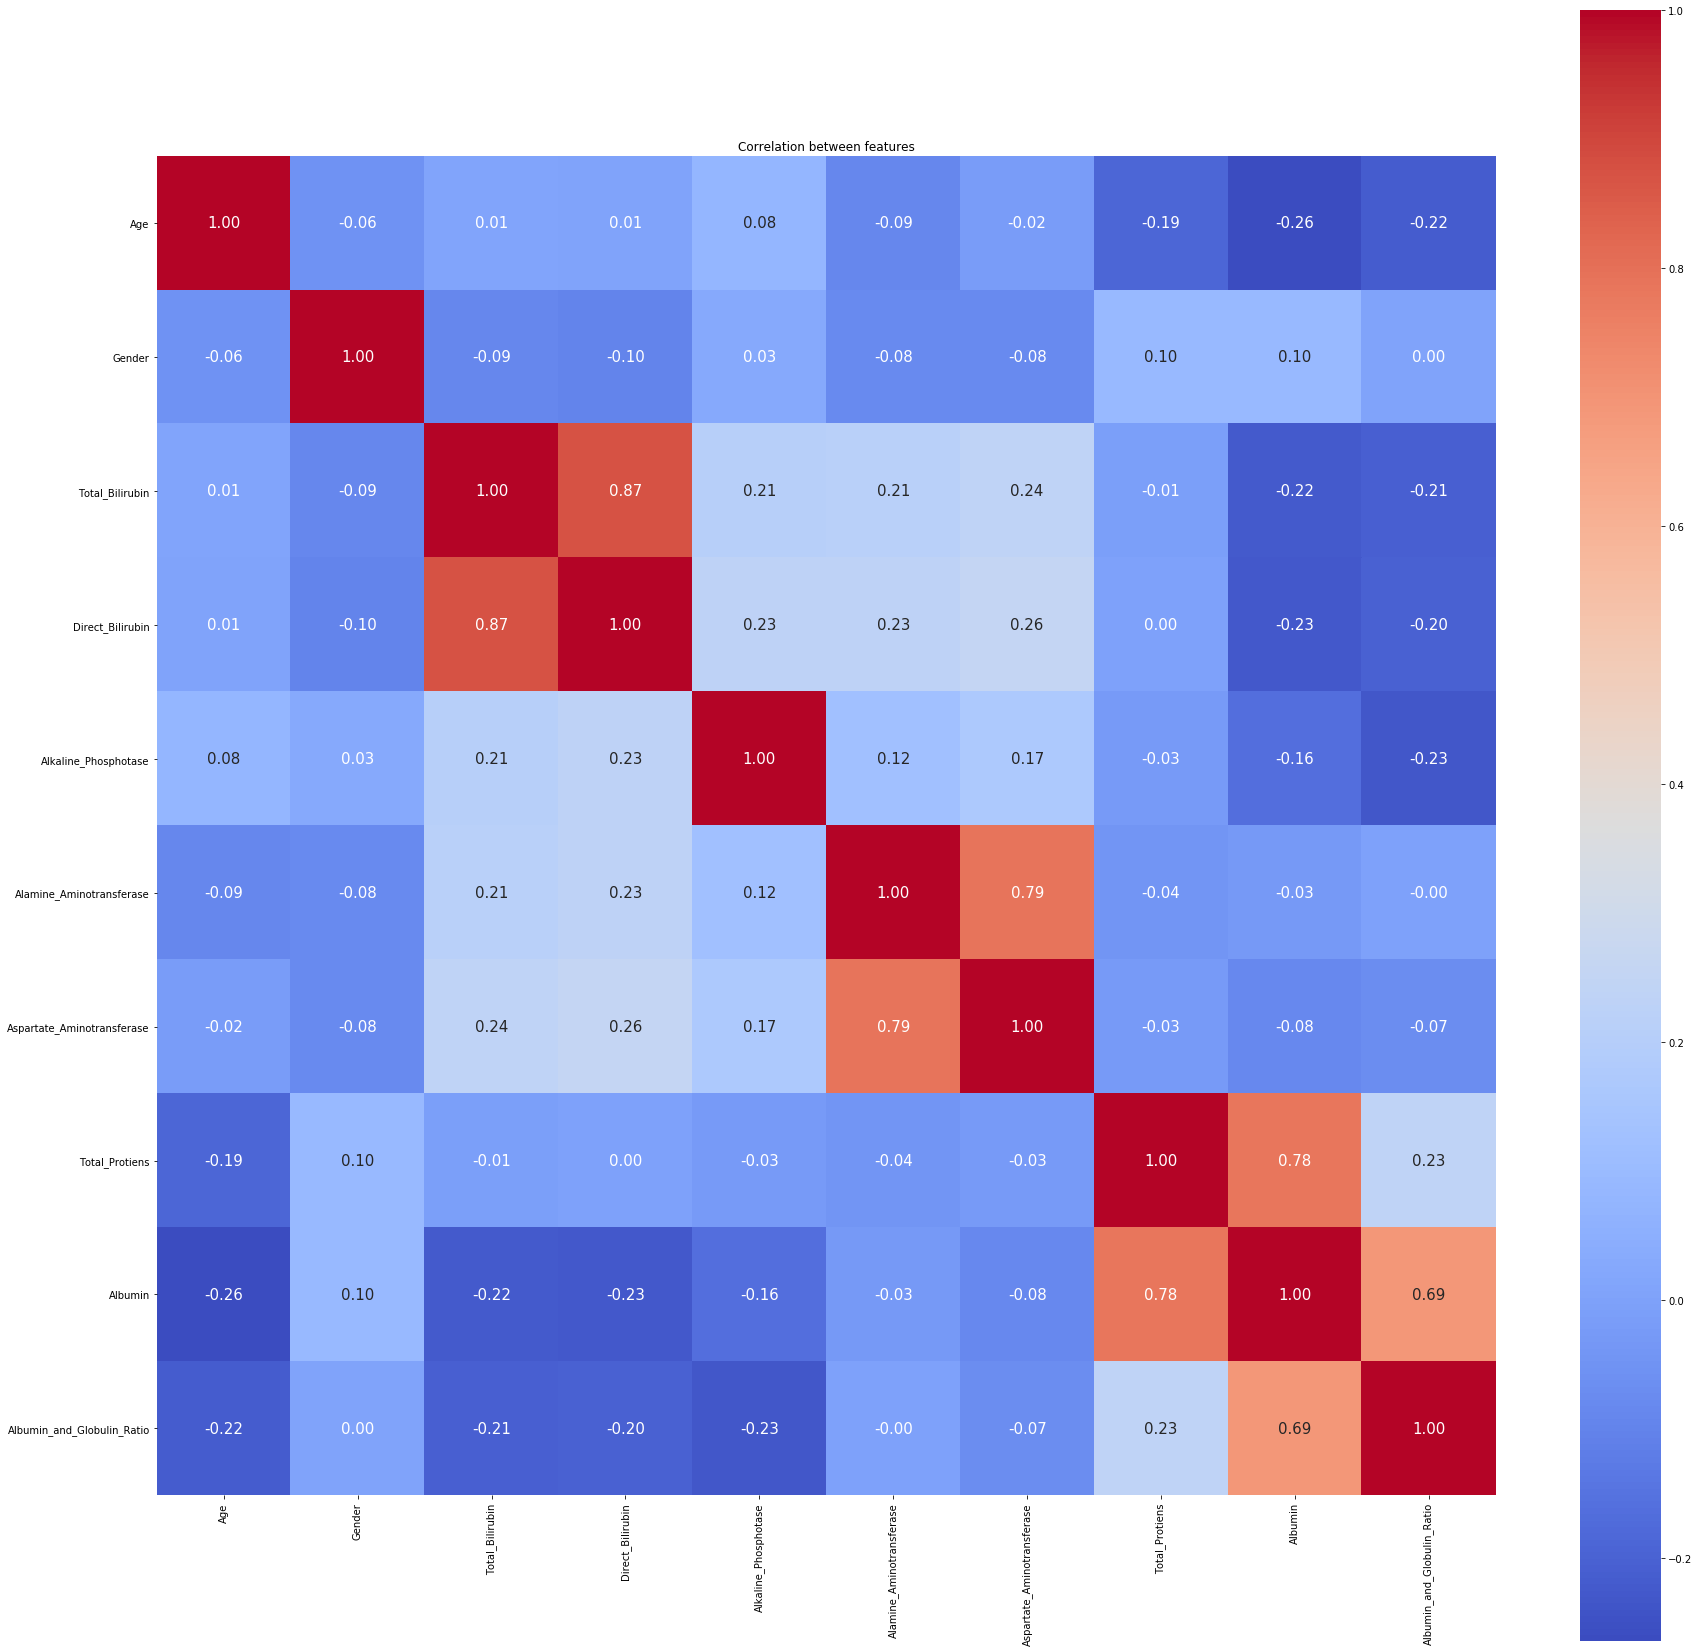

In [220]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [221]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [222]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [223]:
x


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [224]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 579, dtype: int64

# KNeighborsClassifier

In [225]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)                       
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6781609195402298


In [226]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[98, 23],
       [33, 20]], dtype=int64)

In [227]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      0.81      0.78       121
           2       0.47      0.38      0.42        53

    accuracy                           0.68       174
   macro avg       0.61      0.59      0.60       174
weighted avg       0.66      0.68      0.67       174



## Perceptron

In [228]:
from sklearn.linear_model import Perceptron
clf2=Perceptron()
clf2.fit(x_train,y_train)
print('Accuracy:',accuracy_score(clf2.predict(x_test),y_test))

Accuracy: 0.6551724137931034


In [229]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[98, 23],
       [33, 20]], dtype=int64)

In [230]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      0.81      0.78       121
           2       0.47      0.38      0.42        53

    accuracy                           0.68       174
   macro avg       0.61      0.59      0.60       174
weighted avg       0.66      0.68      0.67       174



### Random forest classifier ##

In [231]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier()
clf3.fit(x_train,y_train)
print('Accuracy:',accuracy_score(clf3.predict(x_test),y_test))

Accuracy: 0.7528735632183908


In [232]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[98, 23],
       [33, 20]], dtype=int64)

In [233]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      0.81      0.78       121
           2       0.47      0.38      0.42        53

    accuracy                           0.68       174
   macro avg       0.61      0.59      0.60       174
weighted avg       0.66      0.68      0.67       174



# Support vector machine#

In [234]:
from sklearn.svm import SVC
svc=SVC()                                
svc.fit(x_train,y_train)
y_pred2=svc.predict(x_test)
print(accuracy_score(y_test,y_pred2))

0.6954022988505747


In [235]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[98, 23],
       [33, 20]], dtype=int64)

In [236]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      0.81      0.78       121
           2       0.47      0.38      0.42        53

    accuracy                           0.68       174
   macro avg       0.61      0.59      0.60       174
weighted avg       0.66      0.68      0.67       174



# Naive-bayes#

In [237]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()                               
gnb.fit(x_train,y_train)
print(accuracy_score(y_test,y_pred))

0.6781609195402298


In [238]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[98, 23],
       [33, 20]], dtype=int64)

In [239]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.75      0.81      0.78       121
           2       0.47      0.38      0.42        53

    accuracy                           0.68       174
   macro avg       0.61      0.59      0.60       174
weighted avg       0.66      0.68      0.67       174



# THANK YOU